In [1]:
# *****************
# IMPORT LIBRARIES
# *****************

import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode , iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

print("\n All Libraries are Loaded Successfully")


 All Libraries are Loaded Successfully


In [2]:
#Loading Dataset into notebook
df = pd.read_csv('/content/netflix_titles.csv')

rows = df.shape[0]
columns = df.shape[1]
print(f'The Dataset has {rows} rows and {columns} columns.')

movies = df[df['type'] == 'Movie'].shape[0]
shows = df[df['type'] == 'TV Show'].shape[0]
print(f'The Dataset has {movies} Movies and {shows} TV Shows.')

print("Here's few rows of the Netflix dataset: ")
df.head()

The Dataset has 8807 rows and 12 columns.
The Dataset has 6131 Movies and 2676 TV Shows.
Here's few rows of the Netflix dataset: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Checkout the missing values under the data and evaluate it
missing_count = df.isnull().sum()
missing_percentage = ((missing_count / len(df)) * 100).round(2)

missing_data = pd.DataFrame({
    'Missing Count' : missing_count,
    'Missing Percentage' : missing_percentage
}).sort_values('Missing Count', ascending=False)

print("\n Missing Values Under the Data")
print(missing_data[missing_data['Missing Count']>0])


 Missing Values Under the Data
            Missing Count  Missing Percentage
director             2634               29.91
country               831                9.44
cast                  825                9.37
date_added             10                0.11
rating                  4                0.05
duration                3                0.03


In [7]:
# handling missing values
df['director'].fillna('Unknown', inplace = True)
df['cast'].fillna('Unknown', inplace = True)
df['country'].fillna('Unknown', inplace = True)

#drop rows with missing values
df.dropna(subset = ['date_added','rating','duration'], inplace = True)

print("\n Dataset after handling Missing Values :")
print(df.isnull().sum())

print(f'\n Data Cleaned ! Final Dataset : {df.shape[0]:,} Titles.')


 Dataset after handling Missing Values :
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

 Data Cleaned ! Final Dataset : 8,790 Titles.


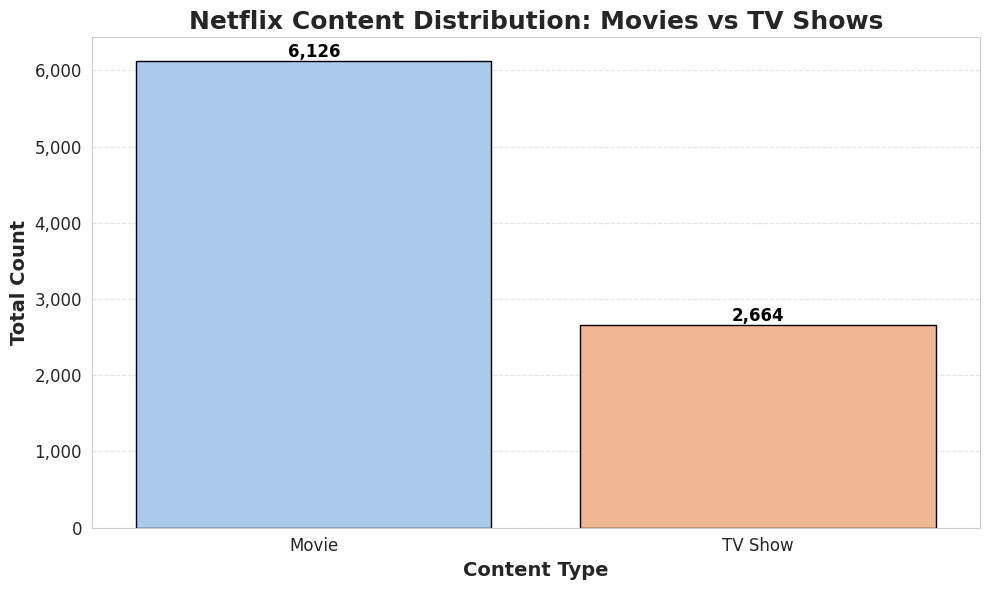

In [17]:
# Distribution of Movies vs TV Shows
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('plots', exist_ok=True)

# Set a cleaner style
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=df['type'].value_counts().index,
    y=df['type'].value_counts().values,
    palette='pastel',
    edgecolor='black'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, fontweight='bold',
        color='black'
    )

# Axis labels and title
plt.xlabel('Content Type', fontsize=14, weight='semibold')
plt.ylabel('Total Count', fontsize=14, weight='semibold')
plt.title('Netflix Content Distribution: Movies vs TV Shows', fontsize=18, weight='bold')

# Grid and formatting
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('plots/distribution_movies_tvshows.png')
plt.show()

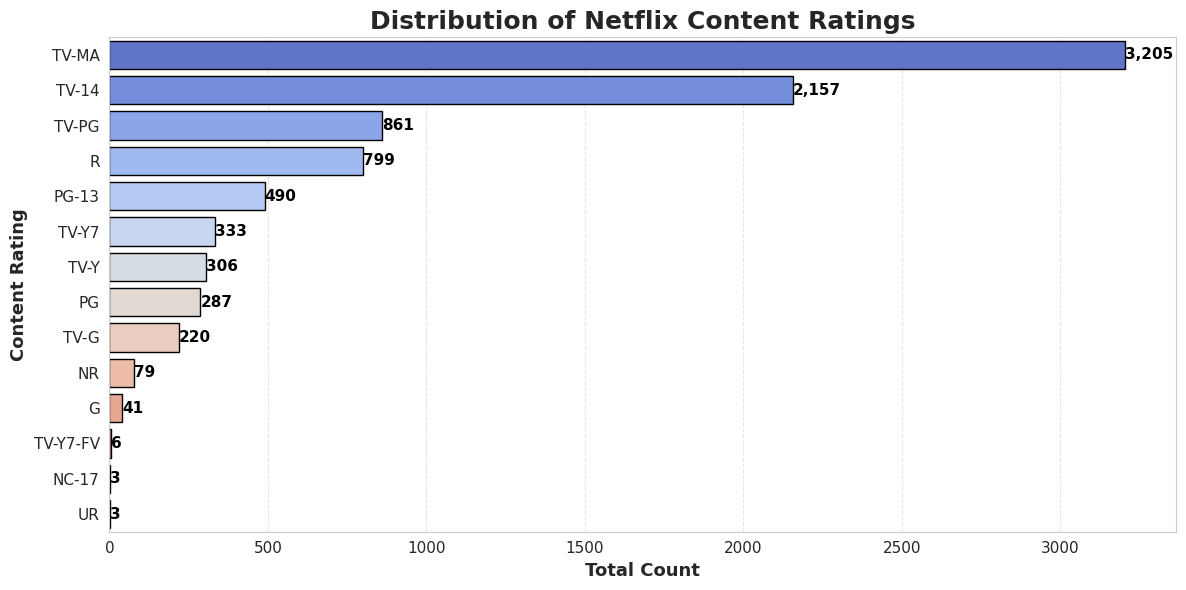

In [18]:
#Distribution of rating
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    y='rating',
    order=df['rating'].value_counts().index,
    palette='coolwarm',
    edgecolor='black'
)

# Add count labels next to each bar
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(
        f'{count:,}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=11, fontweight='semibold',
        color='black'
    )

# Axis labels and title
plt.xlabel('Total Count', fontsize=13, weight='semibold')
plt.ylabel('Content Rating', fontsize=13, weight='semibold')
plt.title('Distribution of Netflix Content Ratings', fontsize=18, weight='bold')

# Grid and formatting
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()